In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sys
import os

In [35]:
raw = pd.read_csv("graduate-admissions/Admission_Predict.csv")
df = raw.loc[:, raw.columns != 'Serial No.']

## Overview of DataSet

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


Basic Information about Dataset

In [37]:
print("There are",len(df.columns),"columns:")

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df=df.rename(columns = {'LOR ':'LOR'})
for x in df.columns:
    sys.stdout.write(str(x)+", ")

There are 8 columns:
GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit, 

In [38]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Check correlation

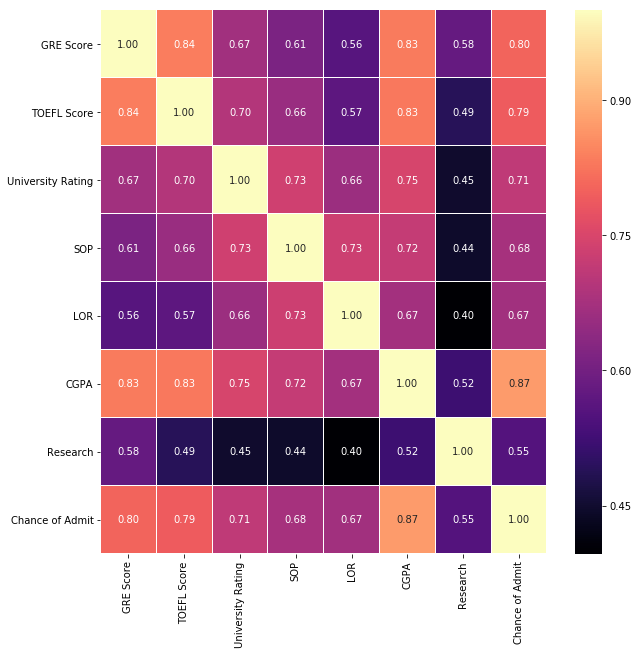

In [39]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.loc[:, df.columns != 'Serial No.'].corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

From the correlation map we can see that research is relatively independent subject. We can make a assumption that having research experience can be a good imporvement for application

### Plotting the distribution of GRE, TOFEL and CGPA seperately for those admited student and non-admited student

In [40]:
#SET 70% AS DEFAULT CUTOFF OF "ADMIT" AND "NON-ADMIT"
ad_df = df[df["Chance of Admit"] >= 0.7]
rj_df = df[df["Chance of Admit"] < 0.7]
#sns.distplot(ad_df["Chance of Admit"])
#sns.distplot(rj_df["Chance of Admit"]).set_title("Comparison of admitted student and non-aditive studetn")



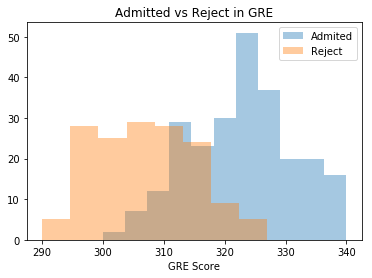

In [41]:
#sns.distplot(df["GRE Score"]).set_title("GRE Score")
sns.distplot(ad_df["GRE Score"],kde = False,label='Admited')
sns.distplot(rj_df["GRE Score"],kde = False,label = 'Reject').set_title("Admitted vs Reject in GRE")
plt.legend()
plt.show()

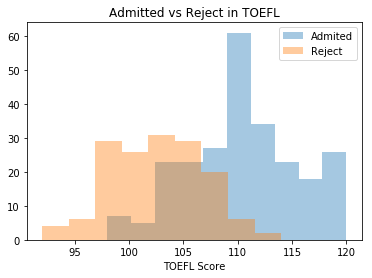

In [42]:
#ax = sns.distplot(df["TOEFL Score"]).set_title('TOEFL Score Distribution')
sns.distplot(ad_df["TOEFL Score"],kde = False,label='Admited')
sns.distplot(rj_df["TOEFL Score"],kde = False,label = 'Reject').set_title("Admitted vs Reject in TOEFL")
plt.legend()
plt.show()

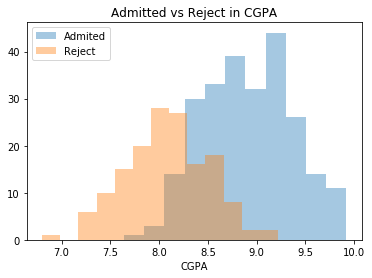

In [43]:
#
sns.distplot(ad_df["CGPA"],kde = False,label='Admited')
sns.distplot(rj_df["CGPA"],kde = False,label = 'Reject').set_title("Admitted vs Reject in CGPA")
plt.legend()
plt.show()

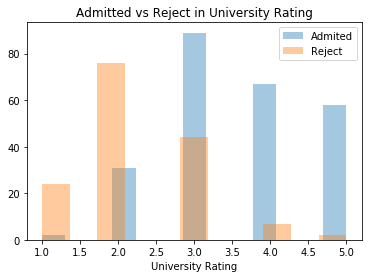

In [44]:
sns.distplot(ad_df["University Rating"],kde = False,label='Admited')
sns.distplot(rj_df["University Rating"],kde = False,label = 'Reject').set_title("Admitted vs Reject in University Rating")
plt.legend()
plt.show()

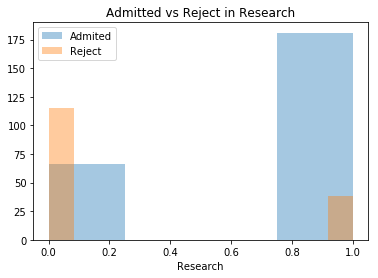

In [45]:
sns.distplot(ad_df['Research'],kde = False,label='Admited')
sns.distplot(rj_df["Research"],kde = False,label = 'Reject').set_title("Admitted vs Reject in Research")
plt.legend()
plt.show()

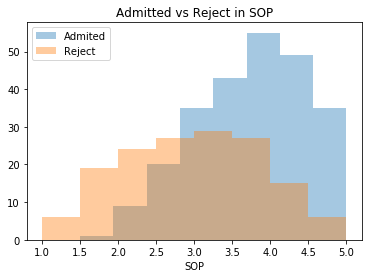

In [47]:
sns.distplot(ad_df['SOP'],kde = False,label='Admited')
sns.distplot(rj_df["SOP"],kde = False,label = 'Reject').set_title("Admitted vs Reject in SOP")
plt.legend()
plt.show()

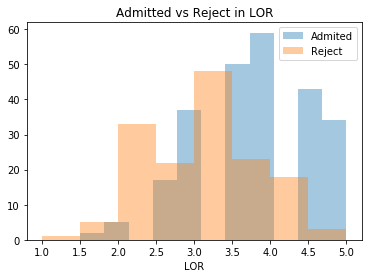

In [48]:
sns.distplot(ad_df['LOR'],kde = False,label='Admited')
sns.distplot(rj_df['LOR'],kde = False,label = 'Reject').set_title("Admitted vs Reject in LOR")
plt.legend()
plt.show()

### Logistic Regression to do Classification

In [15]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [25]:
#data-preparation

admit_rate = 0.7

df_logit = df
df_logit = df_logit.rename(columns = {'Chance of Admit':'result'})
df_logit = df_logit.rename(columns = {'GRE Score':'GRE'})
df_logit = df_logit.rename(columns = {'TOEFL Score':'TOEFL'})
df_logit = df_logit.rename(columns = {'University Rating':'University_rating'})



df_logit.result[df_logit.result < 0.7] = 0
df_logit.result[df_logit.result >= 0.7] = 1

df_logit.head()

/Users/ziyingwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/ziyingwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,GRE,TOEFL,University_rating,SOP,LOR,CGPA,Research,result
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,1.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0


In [26]:
df_logit.result.value_counts()   #not very balanced, probably try over-sampling later

1.0    247
0.0    153
Name: result, dtype: int64

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm



X = df_logit.loc[:, df_logit.columns != 'result']
y = df_logit.loc[:, df_logit.columns == 'result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/ziyingwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


[[25  7]
 [ 7 41]]


Text(0.5,257.44,'Predicted label')

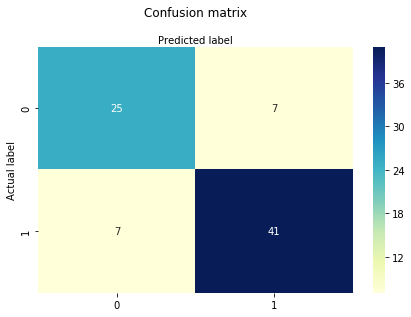

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

        0.0       0.78      0.78      0.78        32
        1.0       0.85      0.85      0.85        48

avg / total       0.82      0.82      0.82        80



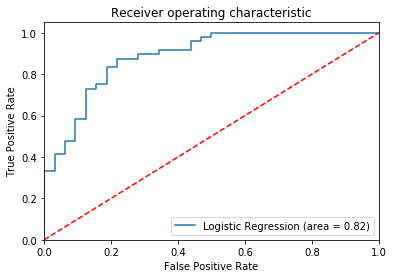

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [70]:
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y, X)
logit.fit().params
logit.summary()

Optimization terminated successfully.
         Current function value: 0.413487
         Iterations 7


AttributeError: 'Logit' object has no attribute 'summary'

In [78]:
from sklearn.feature_selection import RFE
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
fit.ranking_

/Users/ziyingwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 4, 1, 5, 1, 2, 1])